In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, classification_report 

In [76]:
df_0 = pd.read_csv('client_clustering_2_scored.csv', sep = ',')
df_0.head()

,client_id,Recency,I_Recency,Monetary,lifespam,clv,clv_Tile,Rec_Tile,I_Rec_Tile,Mone_Tile,lifespam_Tile,score_v1,score,score_level,cluster_labels
0,6,40,0.024390,3222,655,1157,3,3,3,3,3,3333,12,Loyal,Medium to High Value Customers
1,7,272,0.003663,1190,161,158,1,2,2,2,2,1222,7,Churned,Churned Customers
2,25,347,0.002874,374,0,93,1,1,1,1,1,1111,4,Churned,Churned Customers
3,37,109,0.009091,2803,568,780,3,2,2,3,3,3233,11,Loyal,Medium to High Value Customers
4,40,20,0.047619,14889,707,4418,4,3,3,4,4,4344,15,Premium,Medium to High Value Customers


In [77]:
df['cluster_labels'].value_counts()

Medium to High Value Customers    55106
Churned Customers                 46578
Medium to Low Value Customers     33110
High Value Customers              17613
Name: cluster_labels, dtype: int64

In [78]:
df= df_0[df_0['cluster_labels']!= 'Medium to Low Value Customers']

In [79]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152407 entries, 0 to 152406
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   client_id       152407 non-null  int64  
 1   Recency         152407 non-null  int64  
 2   I_Recency       152407 non-null  float64
 3   Monetary        152407 non-null  int64  
 4   lifespam        152407 non-null  int64  
 5   clv             152407 non-null  int64  
 6   clv_Tile        152407 non-null  int64  
 7   Rec_Tile        152407 non-null  int64  
 8   I_Rec_Tile      152407 non-null  int64  
 9   Mone_Tile       152407 non-null  int64  
 10  lifespam_Tile   152407 non-null  int64  
 11  score_v1        152407 non-null  int64  
 12  score           152407 non-null  int64  
 13  score_level     152407 non-null  object 
 14  cluster_labels  152407 non-null  object 
dtypes: float64(1), int64(12), object(2)
memory usage: 17.4+ MB


In [80]:
#df_0 = pd.get_dummies(df_0["cluster_labels"])

In [81]:
#df_0.info()

In [82]:
#df_0

In [83]:
#df_0["Churned_Validation_set"] = df_0["Standard Value Customer - Potential Churners"]

In [84]:
#df_0.info()

In [85]:
#df_0 = df_0.drop(labels = ["Churned", "New Customers", "Standard Value Customer - Potential Churners", "high value customers"],axis =1)

In [86]:
#df_0

In [87]:
#df_notiles = dfnotiles

In [88]:
#df_notiles

In [89]:
#df_notiles.info()

In [90]:
#df_notiles = df_notiles.drop(labels ="churned",axis =1)

In [91]:
#df_notiles

In [92]:
#df_validation_set = df_notiles.join(df_0, lsuffix="_left", rsuffix="_right")

In [93]:
#df_validation_set.head()

In [95]:
#df_validation_set["Churned_Validation_set"].value_counts(normalize= True)

In [96]:
#df_validation_set.isnull().sum()

In [97]:
# LOOK UP ONLY - FOR VALIDtion SET 

In [98]:
#df_validation_set["Churned_Validation_set"] = df_validation_set["Churned_Validation_set"].astype(int)

In [99]:
df["cluster_labels"].value_counts()

Medium to High Value Customers    55106
Churned Customers                 46578
High Value Customers              17613
Name: cluster_labels, dtype: int64

In [100]:
df.shape

(119297, 15)

In [101]:
df.head()

,client_id,Recency,I_Recency,Monetary,lifespam,clv,clv_Tile,Rec_Tile,I_Rec_Tile,Mone_Tile,lifespam_Tile,score_v1,score,score_level,cluster_labels
0,6,40,0.024390,3222,655,1157,3,3,3,3,3,3333,12,Loyal,Medium to High Value Customers
1,7,272,0.003663,1190,161,158,1,2,2,2,2,1222,7,Churned,Churned Customers
2,25,347,0.002874,374,0,93,1,1,1,1,1,1111,4,Churned,Churned Customers
3,37,109,0.009091,2803,568,780,3,2,2,3,3,3233,11,Loyal,Medium to High Value Customers
4,40,20,0.047619,14889,707,4418,4,3,3,4,4,4344,15,Premium,Medium to High Value Customers


In [102]:
df.dtypes

client_id           int64
Recency             int64
I_Recency         float64
Monetary            int64
lifespam            int64
clv                 int64
clv_Tile            int64
Rec_Tile            int64
I_Rec_Tile          int64
Mone_Tile           int64
lifespam_Tile       int64
score_v1            int64
score               int64
score_level        object
cluster_labels     object
dtype: object

In [103]:
#df.set_index('client_id', inplace=True)
#df.head(3)

In [104]:
df.cluster_labels.value_counts()

Medium to High Value Customers    55106
Churned Customers                 46578
High Value Customers              17613
Name: cluster_labels, dtype: int64

In [105]:
def summarize_columns(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [106]:
summarize_columns(df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
client_id,"[6, 7, 25, 37, 40, 43, 55, 56, 60, 67, 76, 84,...",119297,0
Recency,"[40, 272, 347, 109, 20, 123, 346, 187, 75, 174...",573,0
I_Recency,"[0.024390243902439, 0.0036630036630036, 0.0028...",573,0
Monetary,"[3222, 1190, 374, 2803, 14889, 99, 624, 10749,...",31568,0
lifespam,"[655, 161, 0, 568, 707, 100, 676, 4, 21, 160, ...",691,0
clv,"[1157, 158, 93, 780, 4418, 99, 312, 1891, 0, 3...",6410,0
clv_Tile,"[3, 1, 4, 2]",4,0
Rec_Tile,"[3, 2, 1, 4]",4,0
I_Rec_Tile,"[3, 2, 1, 4]",4,0
Mone_Tile,"[3, 2, 1, 4]",4,0


In [107]:
find_categorical(df)

['clv_Tile',
 'Rec_Tile',
 'I_Rec_Tile',
 'Mone_Tile',
 'lifespam_Tile',
 'score_level',
 'cluster_labels']

In [108]:
df.dtypes

client_id           int64
Recency             int64
I_Recency         float64
Monetary            int64
lifespam            int64
clv                 int64
clv_Tile            int64
Rec_Tile            int64
I_Rec_Tile          int64
Mone_Tile           int64
lifespam_Tile       int64
score_v1            int64
score               int64
score_level        object
cluster_labels     object
dtype: object

In [109]:
from IPython.display import Image

In [112]:
df.head()

,client_id,Recency,I_Recency,Monetary,lifespam,clv,clv_Tile,Rec_Tile,I_Rec_Tile,Mone_Tile,lifespam_Tile,score_v1,score,score_level,cluster_labels
0,6,40,0.024390,3222,655,1157,3,3,3,3,3,3333,12,Loyal,Medium to High Value Customers
1,7,272,0.003663,1190,161,158,1,2,2,2,2,1222,7,Churned,Churned Customers
2,25,347,0.002874,374,0,93,1,1,1,1,1,1111,4,Churned,Churned Customers
3,37,109,0.009091,2803,568,780,3,2,2,3,3,3233,11,Loyal,Medium to High Value Customers
4,40,20,0.047619,14889,707,4418,4,3,3,4,4,4344,15,Premium,Medium to High Value Customers


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_labels', ylabel='count'>

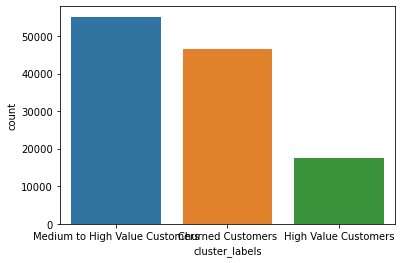

In [113]:
sns.countplot(df['cluster_labels'])

In [116]:
def cluster_number(column):
    if column['cluster_labels'] == 'Churned Customers':
        return 1
    if column['cluster_labels'] == 'Medium to High Value Customers':
        return 2
    if column['cluster_labels'] == 'High Value Customers':
        return 3
    
df['cluster_number'] = df.apply (lambda column: cluster_number(column), axis=1)
df.head()

/var/folders/np/7wstqrjj7h77xmr2lv_bt64h0000gn/T/ipykernel_4606/1152197843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_number'] = df.apply (lambda column: cluster_number(column), axis=1)


,client_id,Recency,I_Recency,Monetary,lifespam,clv,clv_Tile,Rec_Tile,I_Rec_Tile,Mone_Tile,lifespam_Tile,score_v1,score,score_level,cluster_labels,cluster_number
0,6,40,0.024390,3222,655,1157,3,3,3,3,3,3333,12,Loyal,Medium to High Value Customers,2
1,7,272,0.003663,1190,161,158,1,2,2,2,2,1222,7,Churned,Churned Customers,1
2,25,347,0.002874,374,0,93,1,1,1,1,1,1111,4,Churned,Churned Customers,1
3,37,109,0.009091,2803,568,780,3,2,2,3,3,3233,11,Loyal,Medium to High Value Customers,2
4,40,20,0.047619,14889,707,4418,4,3,3,4,4,4344,15,Premium,Medium to High Value Customers,2


In [117]:
df.shape

(119297, 16)

In [118]:
dfc = df.copy()

In [119]:
dfno_tiles = df.drop(['clv_Tile','Recency','I_Rec_Tile','Rec_Tile','Mone_Tile','lifespam_Tile','score_v1','score','score_level'],axis=1)

print(dfno_tiles.shape)

(119297, 7)


In [120]:
dfno_tiles.head()

,client_id,I_Recency,Monetary,lifespam,clv,cluster_labels,cluster_number
0,6,0.024390,3222,655,1157,Medium to High Value Customers,2
1,7,0.003663,1190,161,158,Churned Customers,1
2,25,0.002874,374,0,93,Churned Customers,1
3,37,0.009091,2803,568,780,Medium to High Value Customers,2
4,40,0.047619,14889,707,4418,Medium to High Value Customers,2


In [121]:
#dfno_tiles = dfno_tiles.drop(['cluster_labels'], axis=1)
dfno_tiles = dfno_tiles.drop(['Monetary'], axis=1)
dfno_tiles.head()

,client_id,I_Recency,lifespam,clv,cluster_labels,cluster_number
0,6,0.024390,655,1157,Medium to High Value Customers,2
1,7,0.003663,161,158,Churned Customers,1
2,25,0.002874,0,93,Churned Customers,1
3,37,0.009091,568,780,Medium to High Value Customers,2
4,40,0.047619,707,4418,Medium to High Value Customers,2


In [122]:
df.shape

(119297, 16)

In [123]:
# Defining the cluster label column
def churners(column):
    if column['cluster_number'] == 2:
        return 0
    if column['cluster_number'] == 3:
        return 0
    else:
        return 1 
    
dfno_tiles['churned'] = dfno_tiles.apply (lambda column: churners(column), axis=1)
dfno_tiles.head()

,client_id,I_Recency,lifespam,clv,cluster_labels,cluster_number,churned
0,6,0.024390,655,1157,Medium to High Value Customers,2,0
1,7,0.003663,161,158,Churned Customers,1,1
2,25,0.002874,0,93,Churned Customers,1,1
3,37,0.009091,568,780,Medium to High Value Customers,2,0
4,40,0.047619,707,4418,Medium to High Value Customers,2,0


[Text(0, 0, '72719'), Text(0, 0, '46578')]

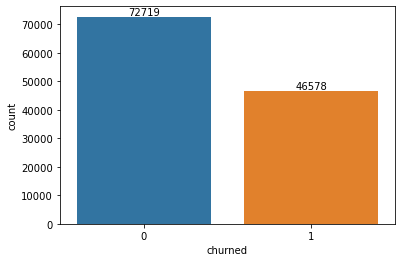

In [125]:
ax = sns.countplot(x=dfno_tiles['churned'],
                   order=dfno_tiles['churned'].value_counts(ascending=False).index);
abs_values = dfno_tiles['churned'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [126]:
dfno_tiles.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,119297.0,1.138243e+06,657494.830598,6.000000,568656.000000,1.137968e+06,1.710119e+06,2274517.0
I_Recency,119297.0,4.968713e-02,0.075235,0.001374,0.004367,2.127660e-02,5.882353e-02,1.0
lifespam,119297.0,4.133496e+02,302.220817,0.000000,42.000000,5.830000e+02,6.860000e+02,729.0
clv,119297.0,2.019938e+03,2756.205702,-324.000000,198.000000,8.160000e+02,2.737000e+03,26989.0
cluster_number,119297.0,1.757203e+00,0.692193,1.000000,1.000000,2.000000e+00,2.000000e+00,3.0
churned,119297.0,3.904373e-01,0.487850,0.000000,0.000000,0.000000e+00,1.000000e+00,1.0


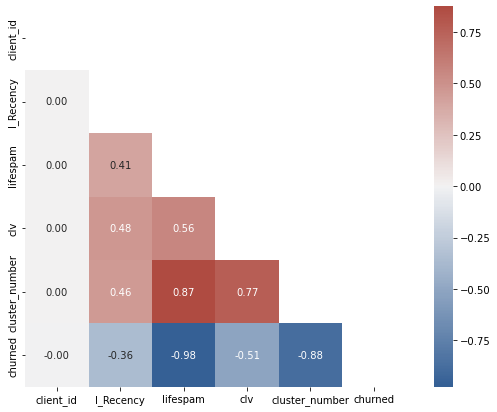

In [127]:
# Calculate pairwise-correlation for class 1
matrix = dfno_tiles.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [128]:
#sns.lmplot('Monetary', 'clv', data=dfno_tiles, hue='churned',
           #scatter_kws={'alpha': 0.1})
#fig = sns.lmplot('lifespam', 'clv', data=dfno_tiles, hue='churned',
                 #scatter_kws={'alpha': 0.1})
#fig.set_xlabels('churned');

In [129]:
dfnotiles = dfno_tiles.copy()

In [130]:
# Scaling the numerical features
numerical_cols = ['I_Recency','lifespam','clv']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dfnotiles[numerical_cols] = scaler.fit_transform(dfno_tiles[numerical_cols])
dfnotiles.head()

,client_id,I_Recency,lifespam,clv,cluster_labels,cluster_number,churned
0,6,0.023048,0.898491,0.054223,Medium to High Value Customers,2,0
1,7,0.002293,0.220850,0.017647,Churned Customers,1,1
2,25,0.001502,0.000000,0.015267,Churned Customers,1,1
3,37,0.007728,0.779150,0.040420,Medium to High Value Customers,2,0
4,40,0.046309,0.969822,0.173617,Medium to High Value Customers,2,0


In [131]:
dfnotiles = dfnotiles.drop(['cluster_number'], axis =1)
dfnotiles.head()

,client_id,I_Recency,lifespam,clv,cluster_labels,churned
0,6,0.023048,0.898491,0.054223,Medium to High Value Customers,0
1,7,0.002293,0.220850,0.017647,Churned Customers,1
2,25,0.001502,0.000000,0.015267,Churned Customers,1
3,37,0.007728,0.779150,0.040420,Medium to High Value Customers,0
4,40,0.046309,0.969822,0.173617,Medium to High Value Customers,0


In [132]:
dfnotiles = dfnotiles.drop(["cluster_labels"], axis = 1)

In [133]:
dfnotiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119297 entries, 0 to 152406
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  119297 non-null  int64  
 1   I_Recency  119297 non-null  float64
 2   lifespam   119297 non-null  float64
 3   clv        119297 non-null  float64
 4   churned    119297 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 5.5 MB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churned', ylabel='count'>

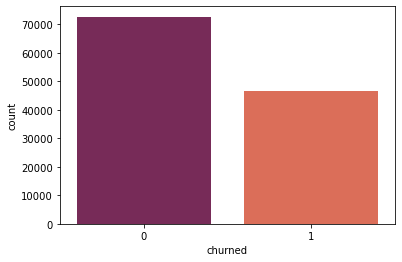

In [134]:
sns.countplot(dfnotiles['churned'] , palette = 'rocket')

In [135]:
dfnotiles['churned'].value_counts(normalize = True) 

0    0.609563
1    0.390437
Name: churned, dtype: float64

In [136]:
import seaborn as sns

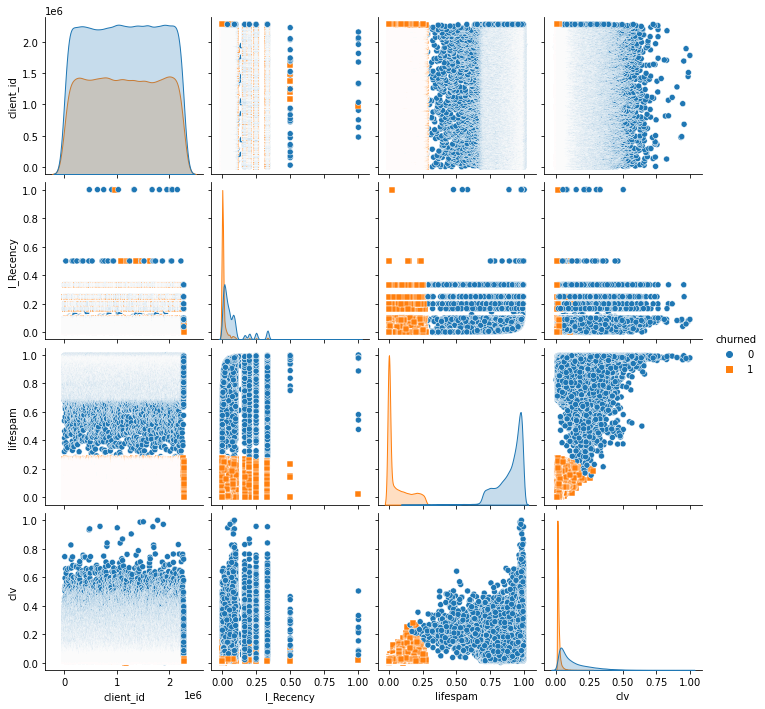

In [137]:
sns.pairplot(dfnotiles, hue="churned", markers=["o", "s"])

In [139]:
dfnotiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119297 entries, 0 to 152406
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  119297 non-null  int64  
 1   I_Recency  119297 non-null  float64
 2   lifespam   119297 non-null  float64
 3   clv        119297 non-null  float64
 4   churned    119297 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 9.5 MB


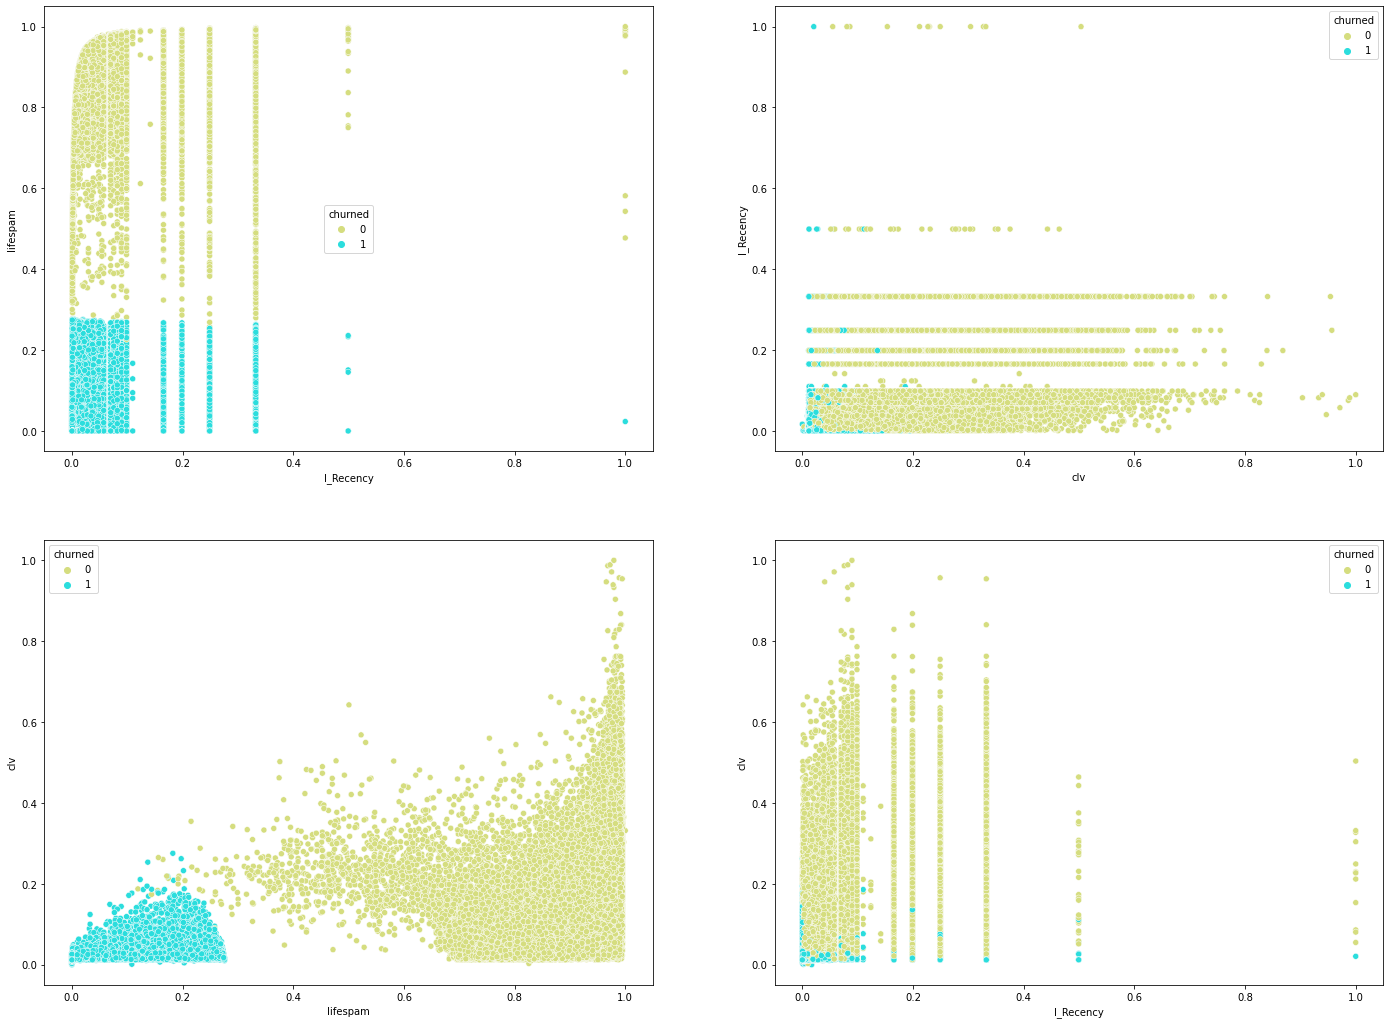

In [140]:
fig, ax = plt.subplots(2,2, figsize=(24,18))

sns.scatterplot(data=dfnotiles, x="I_Recency", y="lifespam", hue="churned", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=dfnotiles, x="clv", y="I_Recency", hue="churned", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=dfnotiles, x="lifespam", y="clv", hue="churned", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=dfnotiles, x="I_Recency", y="clv", hue="churned", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()


In [141]:
! pip3 install markupsafe==2.0.1

In [142]:
! pip3 install jinja2

In [143]:
pip install pycaret --user

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install numba==0.53

Note: you may need to restart the kernel to use updated packages.


In [145]:
from pycaret.classification import *
Models  = setup(dfnotiles, target = 'churned')

,Description,Value
0,session_id,2533
1,Target,churned
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(119297, 5)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


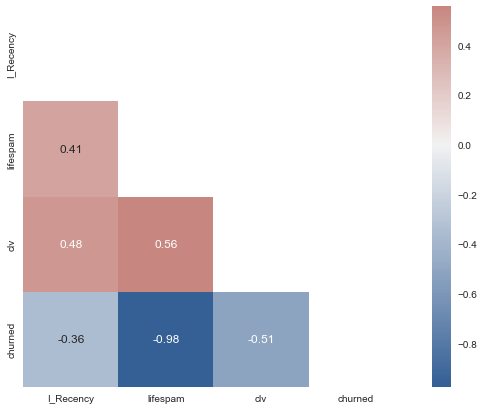

In [170]:
# Calculate pairwise-correlation for class 1
matrix = dfnotiles.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [171]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9999,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,0.2860
dt,Decision Tree Classifier,0.9998,0.9998,0.9997,0.9998,0.9998,0.9996,0.9996,0.0390
rf,Random Forest Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,0.5130
ada,Ada Boost Classifier,0.9998,1.0000,0.9998,0.9997,0.9998,0.9996,0.9996,0.2990
gbc,Gradient Boosting Classifier,0.9998,1.0000,0.9998,0.9997,0.9997,0.9995,0.9995,0.8850
xgboost,Extreme Gradient Boosting,0.9998,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,0.4340
lightgbm,Light Gradient Boosting Machine,0.9998,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,0.6670
qda,Quadratic Discriminant Analysis,0.9992,0.9998,0.9982,0.9998,0.9990,0.9983,0.9983,0.0280
ridge,Ridge Classifier,0.9965,0.0000,1.0000,0.9912,0.9956,0.9927,0.9927,0.0260
lda,Linear Discriminant Analysis,0.9965,0.9993,1.0000,0.9912,0.9956,0.9927,0.9927,0.0330


In [173]:
#dfnotiles = dfnotiles.drop(labels = "client_id", axis = 1)

# Sensitivity Analysis 

In [174]:
import matplotlib.pyplot as plt
from  sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [175]:
x = dfnotiles.iloc[:, :-1]
y = dfnotiles['churned']

#categorical_columns = list(x.select_dtypes(include='object').columns)
numeric_columns = list(x.select_dtypes(exclude='object').columns)

In [176]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.20, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.20, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
#x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(119297, 3), (119297,), (95437, 3), (23860, 3), (95437,), (23860,)]

In [186]:
clf_dt = DecisionTreeClassifier(random_state = 42, max_leaf_nodes = 50,  max_depth=5 )
clf_dt = clf_dt.fit(x_train, y_train)

In [187]:
dfnotiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119297 entries, 0 to 152406
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   I_Recency  119297 non-null  float64
 1   lifespam   119297 non-null  float64
 2   clv        119297 non-null  float64
 3   churned    119297 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.6 MB


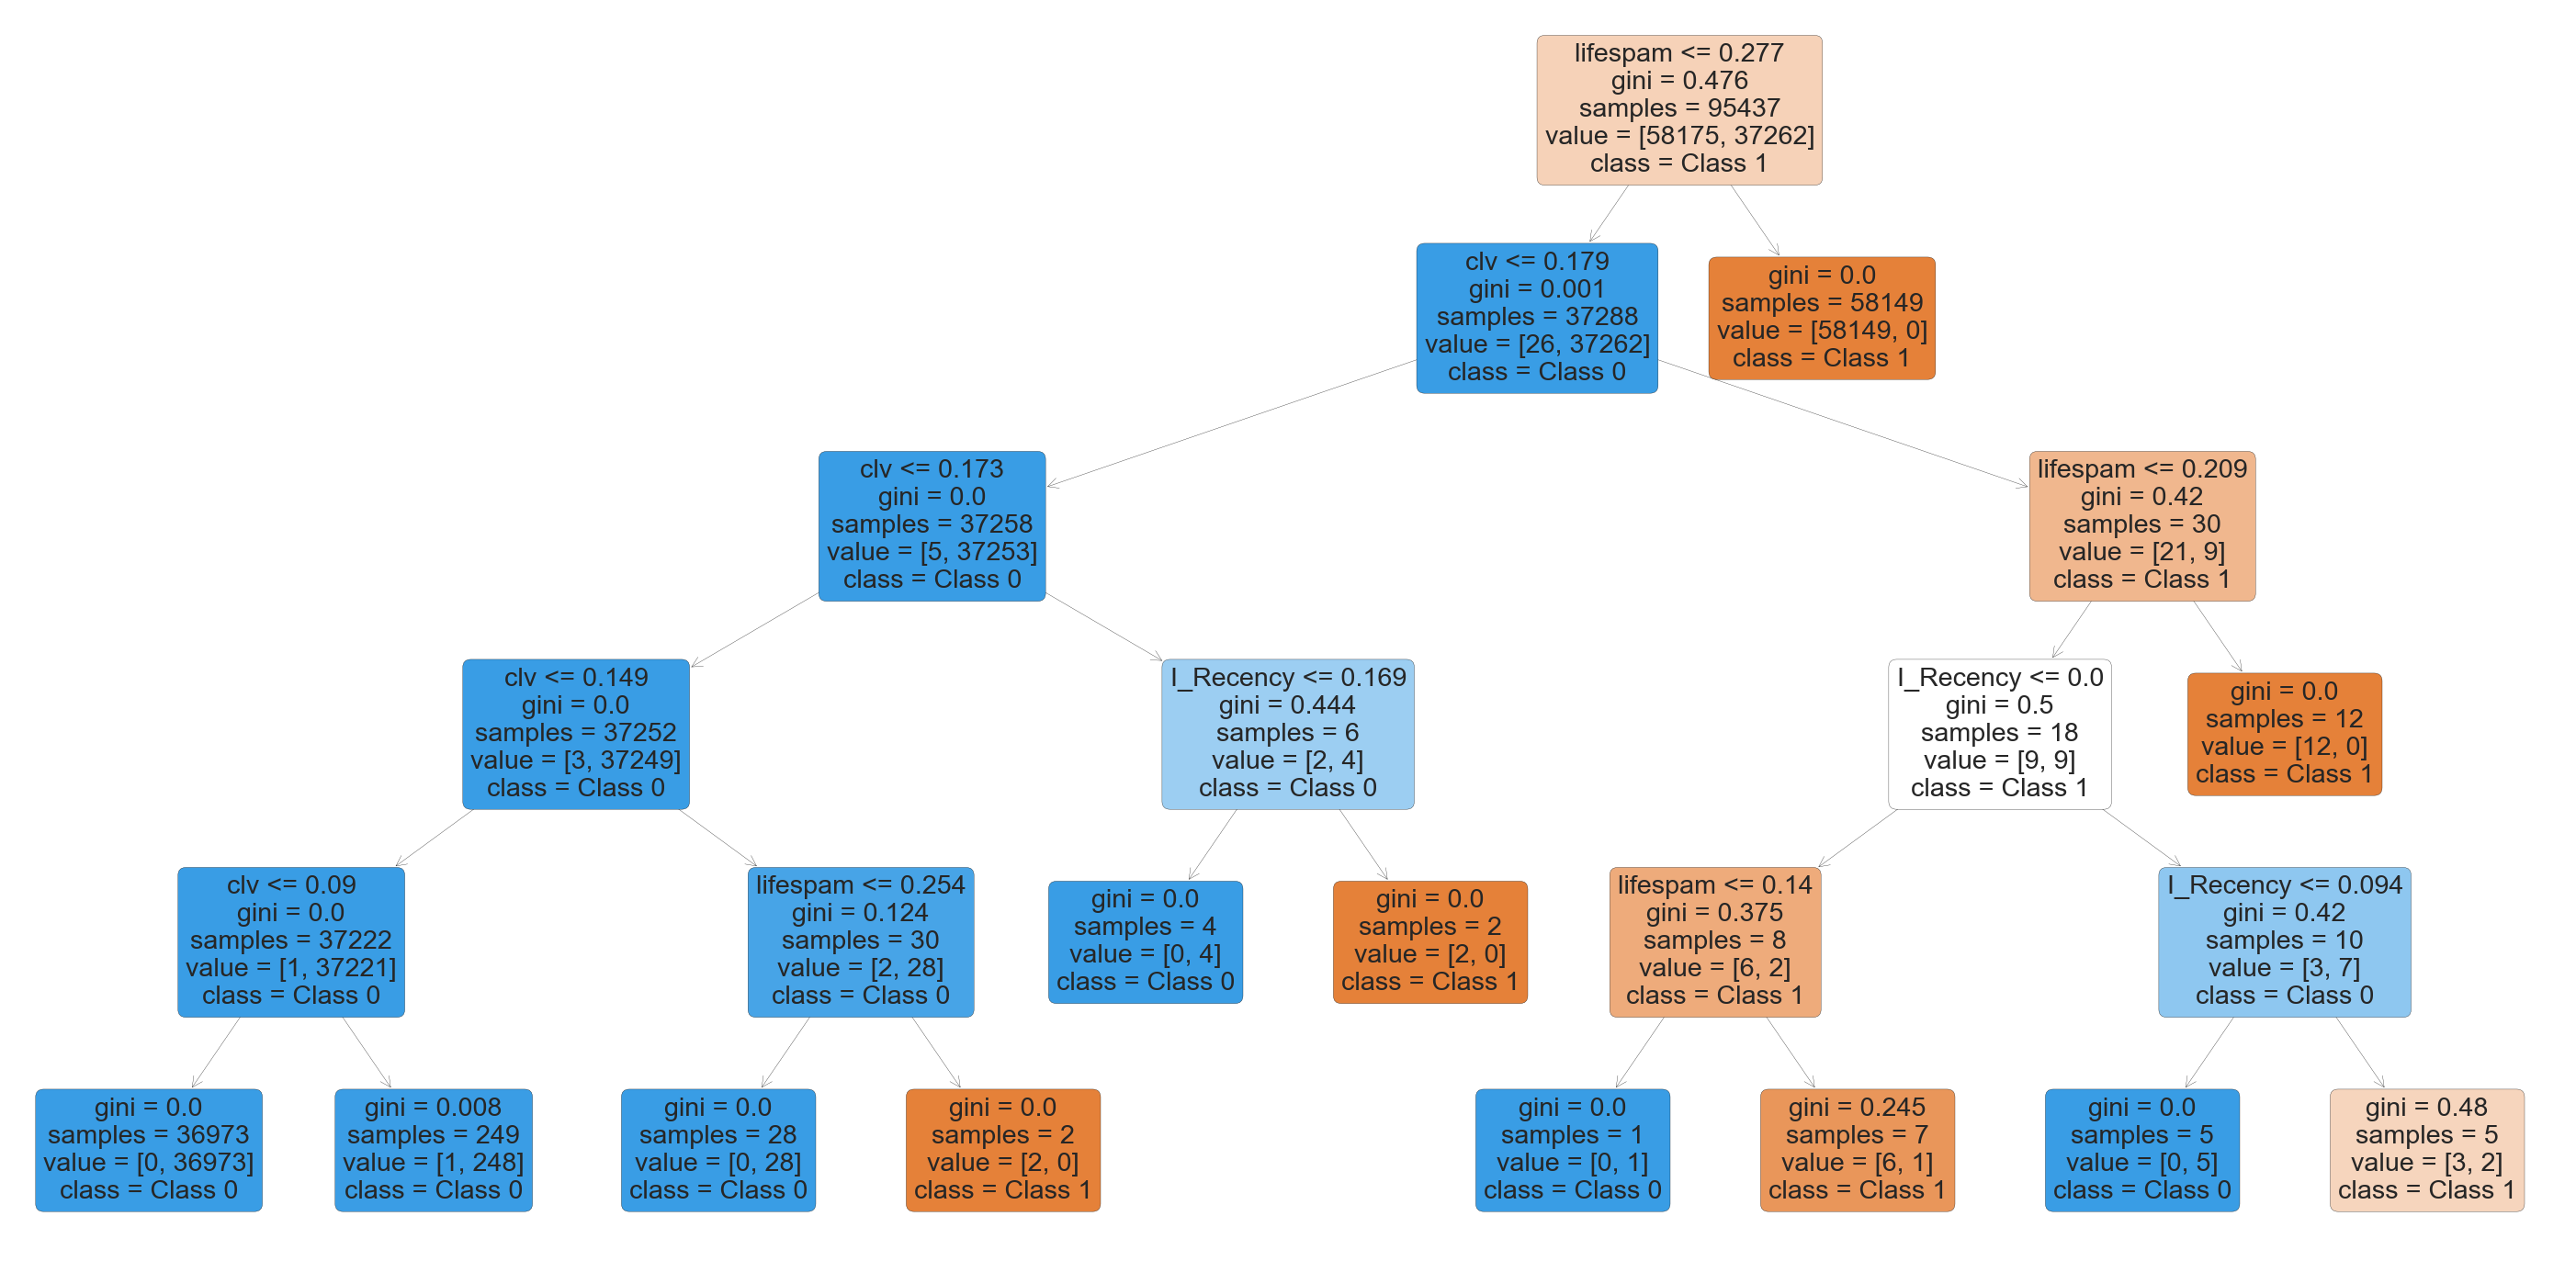

In [188]:
plt.figure(figsize=(50,25))
plot_tree(clf_dt,
          filled = True, 
          rounded = True, 
          class_names = ["Class 1", "Class 0"],  
          feature_names = ["I_Recency", "lifespam", "clv"]);

In [155]:
clf_dt = DecisionTreeClassifier(random_state = 42, max_leaf_nodes = 10,  max_depth=4)
clf_dt = clf_dt.fit(x_train, y_train)

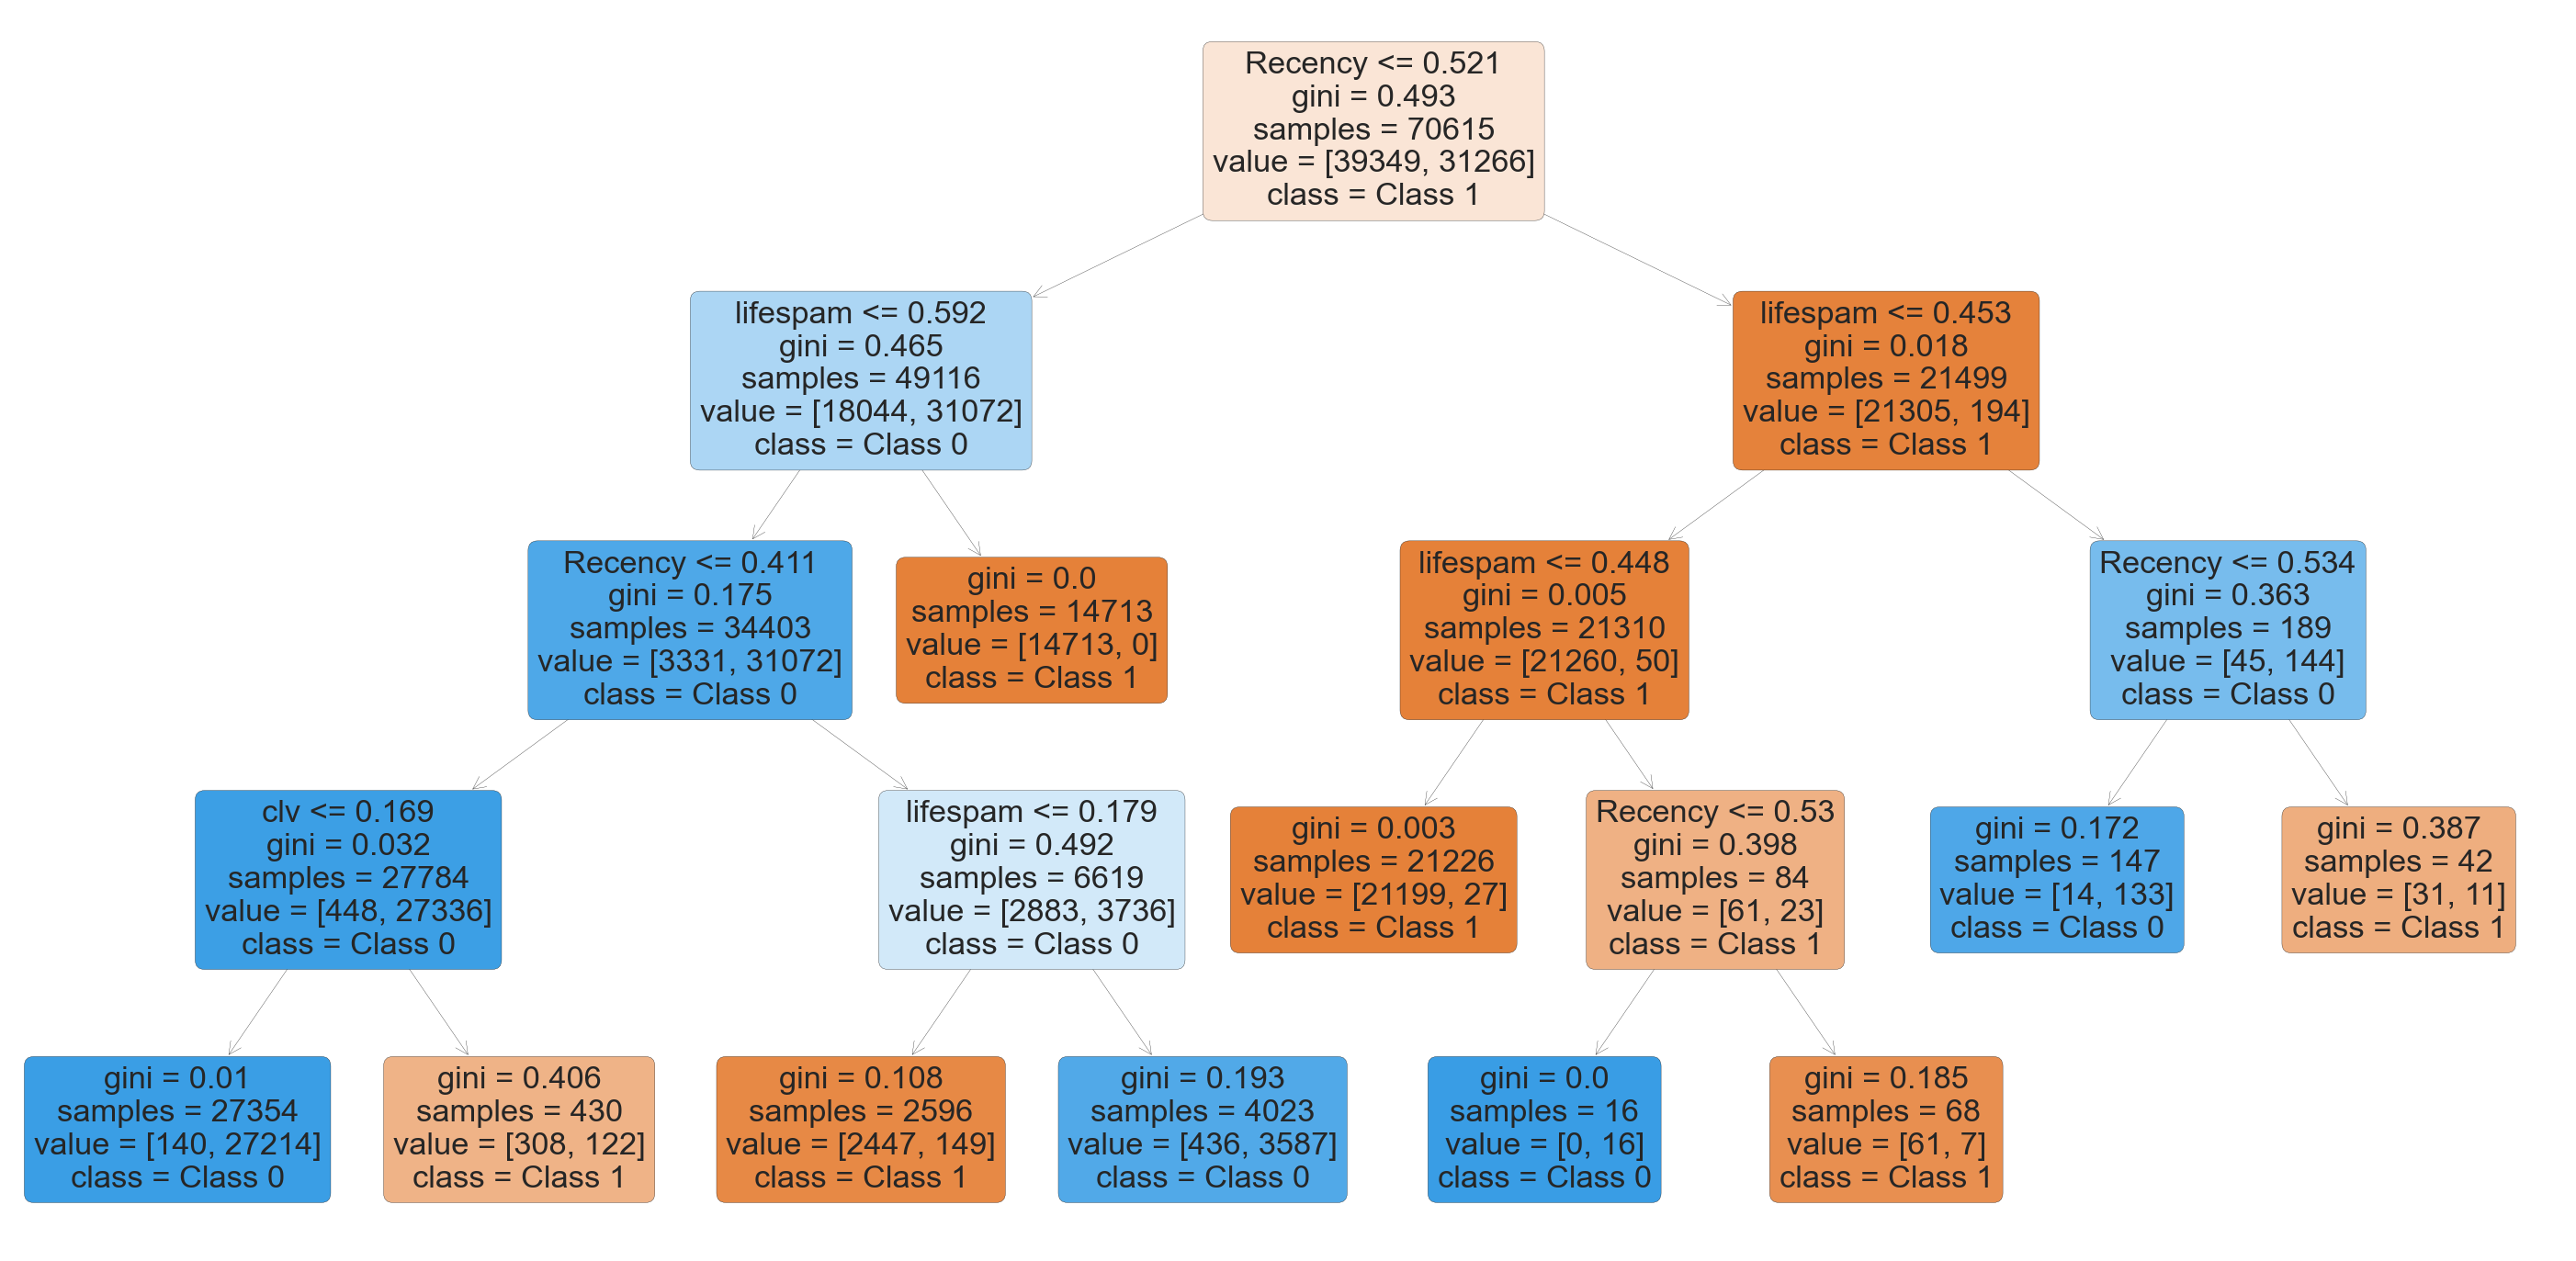

In [89]:
plt.figure(figsize=(50,25))
plot_tree(clf_dt,
          filled = True, 
          rounded = True, 
          class_names = ["Class 1", "Class 0"],  
          feature_names = ["Recency", "lifespam", "clv"]);